## The Monte Carlo Method



![img](./img/casino.jpg)

-   Statistical technique used to solve mathematical problems through
    random sampling and simulation.

-   Named after the famous Monte Carlo Casino in Monaco

-   Repeatedly sample random values for uncertain variables then compute
    the results of a mathematical model or system with these variables.

-   Iterations generate a distribution of outcomes, which can be
    analyzed to gain insights in the behavior of the system modeled.

-   Useful for solving problems that may be difficult or impossible to
    solve analytically, for example integrals in high-dimensional spaces.

-   Books and articles:
    1.  [Sobol, 1994](https://archive.org/details/APrimerForTheMonteCarloMethod/mode/2up) - Primer
    
    2.  [Kahn, 1954](https://www.osti.gov/servlets/purl/4353680) - Applications
    
    3.  [Senova et al, 2023](https://www.mdpi.com/2071-1050/15/2/1006) - Risk assessment
    
    4.  [Mazzola, 2022](https://arxiv.org/abs/2308.07964) - Quantum computing



### Overview



You will learn:

-   How to generate random vectors
-   How to check if a function was loaded
-   How to create a random vector
-   How to set a random seed
-   How to create a random matrix
-   How to simulate rolling dice
-   How to determine the area below a line
-   How to estimate the area under an arbitrary curve
-   How to estimate the area in a square
-   How to estimate &pi;



### Random vectors



If you generate a random point in a three-dimensional space, the $x$,
$y$ and $z$ components of the vector would need to be random numbers.

The `rand` function in the `numpy.random` module returns multiple random
values in an array. Let's load it first:



In [1]:
from numpy.random import rand

### Check if a function was loaded



How can you check if a function was loaded (without trying to run it
and generating an error? In R, there is a convenient function for
that (`search`) but in Python, you have to write one.

The `dir` function lists all methods and attributes of a function. For
example, if `dir(rand)` is not `None`, the function is loaded.

Test that with `numpy.random.rand`:



In [1]:
print(dir(rand))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__text_signature__']

Write a function `loaded` that accepts a function name and checks if it
is loaded using `dir`. Test it with:

1.  with `numpy.random.rand`.
2.  with `exit` from the `sys` library.
3.  with the `datetime` module from the `datetime` library.
4.  show the current time with `now` from `datetime.datetime`.



In [1]:
def loaded(function):
    '''Check if function was loaded.

    function: return __name__ attribute
    '''
    if dir(function) != None:
        return print(f'{function.__name__} loaded')
    return print(f'{function.__name__} not loaded')

from numpy.random import rand
loaded(rand)

from sys import exit
loaded(exit)

from datetime import datetime
loaded(datetime)

# show the current time
print(datetime.now())

rand loaded
exit loaded
datetime loaded
2023-11-20 22:21:44.150493

This is easier than searching through a list of all functions:



In [1]:
[print(f'{name} {value}') for name, value in globals().items()];

#+begin_example
__name__ __main__
__doc__ None
__package__ None
__loader__ <class '_frozen_importlib.BuiltinImporter'>
__spec__ None
__annotations__ {}
__builtins__ <module 'builtins' (built-in)>
__PYTHON_EL_eval <function __PYTHON_EL_eval at 0x000001E8D60B8C20>
__PYTHON_EL_eval_file <function __PYTHON_EL_eval_file at 0x000001E8D60B9E40>
__org_babel_python_tmpfile <_io.TextIOWrapper name='c:/Users/BIRKEN~1/AppData/Local/Temp/babel-ebaY3o/python-fjKfrY' mode='r' encoding='cp1252'>
rand <built-in method rand of numpy.random.mtrand.RandomState object at 0x000001E8F6616840>
loaded [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
pd <module 'pandas' from 'c:\\Users\\birkenkrahe\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\pandas\\__init__.py'>
exit <built-in function exit>
datetime <class 'datetime.datetime'>
np <module 'numpy' from 'c:\\Users\\birkenkrahe\\AppData\\Local\\Programs\\Python\\Python311\\Lib

### Create a random vector



Back to random numbers! Load `numpy` as `np` and then create a vector `vec`
of three random numbers using `rand`:



In [1]:
import numpy as np
vec = np.random.rand(3)
print(vec)

[0.252 0.787 0.495]

Notice how you get different numbers each time you run the code
block.



### Repeating random numbers



To get the same result, you can set the `seed`:



In [1]:
np.random.seed(11212023)
print(vec)

[0.38576552 0.89914262 0.73328807]

Wrap this code into a function `Seed`:

1.  when called without an argument or with `0`, set `seed` to `None`.
2.  when called with a non-zero argument, set `seed` to that number.



In [1]:
def Seed(num=0):
    '''Set random seed
    num: random seed (default 0 or None)
    '''
    if num == 0:
        np.random.seed(None)
    else:
        np.random.seed(num)

Check that `seed` is loaded:



In [1]:
loaded(Seed)

Seed loaded

Why can you be sure that `loaded` checked for your function `Seed` and not
for the function `seed` from the `numpy` package?
> The `seed` function was implicitly loaded with all of `numpy` with the
> command `import numpy as np` and needs to be addressed as
> `np.random.seed`, and our function is `Seed` and not `seed`.Test your function `seed`.



In [1]:
# set seed to None
Seed()

# create a vector of three random numbers and print it thrice
[print(np.random.rand(3)) for i in range(3)]

# set seed to today's date
Seed(1)

# create a vector of three random numbers and print it thrice
[print(np.random.rand(3)) for i in range(3)]

[0.402 0.433 0.979]
[0.611 0.405 0.373]
[0.462 0.753 0.959]
[4.170e-01 7.203e-01 1.144e-04]
[0.302 0.147 0.092]
[0.186 0.346 0.397]

### Create a large number of random vectors



To create a large number of random vectors, create a matrix of random
values: the function `ranf` accepts a single argument, a tuple of two
integers with the size of the matrix `mat`:



In [1]:
# create 100 x 3 random matrix
mat = np.random.ranf((100,3))

# print the first three rows of the matrix
print(mat[0:3])  # same as mat[0:4,] or mat[0:4,:]

[[0.139 0.101 0.448]
 [0.761 0.232 0.809]
 [0.252 0.084 0.513]]

To limit the number of decimals printed (not generated), set the `numpy`
function `set_printoptions` to 3, then print the first four rows of `mat`:



In [1]:
np.set_printoptions(precision=3)
print(mat[0:4])

[[0.442 0.865 0.543]
 [0.493 0.418 0.062]
 [0.362 0.093 0.566]
 [0.641 0.768 0.633]]

`numpy` statistics are vectorized: compute the average across columns:



In [1]:
print(mat.mean(0))

[0.494 0.491 0.501]

The average for the normal distribution of a sequence of pseudorandom
numbers between 0 and 1 should be close to 0.5.



### Rolling dice



Rolling a six-sided die is a common example for random number
generators. To generate random integers, we can use `randint` from
`numpy.random`. Its first two arguments are the lower bound (included)
and the upper bound (excluded), its 3rd argument is number of draws:



In [1]:
import numpy as np

print(np.random.randint(1,7))  # roll die once
print(np.random.randint(1,7,10)) # roll die 10 times

3
[3 6 4 5 1 2 4 5 6 3]

By sending a tuple to the third argument, the result is a random matrix:



In [1]:
print(np.random.randint(1,7,(5,2))) # 5 x 2 random matrix of values in {1-6}

[[6 2]
 [4 1]
 [1 3]
 [3 6]
 [6 6]]

Challenge: roll 5 dice 10,000,000 times and store the result in `mat`:



In [1]:
N = int(1e7)
mat = np.random.randint(1,7,(N,5))
print(mat[0:4]) # the first four draws with 5 fair dice

[[2 2 3 6 2]
 [2 5 2 5 3]
 [1 2 5 5 5]
 [4 3 6 3 3]]

Find all the cases in which the 5 dice have the same values:



In [1]:
# create a new N x 4 matrix of zeros
minus = np.zeros((N,4)) 

# the value in minux[m,n] is the abs value of mat[m,0]-mat[m,n+1], or
# the difference of one row value to the first value in the row
for i in range(4):
    minus[:,i] = abs(mat[:,0]-mat[:,i+1])

# sum horizontally across minus columns - adds has N elements
# if a row n in mat has the same values, then adds[n] == 0
adds = minus.sum(1)

# count the number of times that 0 appears in adds
ct = (adds==0).sum()

# print count
print(f'Number of identical dice rolls in {N} rolls = {ct}')

Number of identical dice rolls in 10000000 rolls = 7803

Mathematically, the probability that all dice show the same number in
one roll is N \* (1/6)<sup>4</sup>:



In [1]:
N = 10000000  # Number of rolls
probability_same_number = (1/6)**4  

# Calculating the expected count
expected_count = N * probability_same_number
print(expected_count)

7716.049382716048

### The Monte Carlo Method recipe



The Monte Carlo method generates random data and receives results from
the interaction of that data.

A simple example: generate points in a defined space and determine
which side of a decision surface the points reside.

We're going to discuss several examples of increasing complexity:

-   Horizontal barrier (1d)
-   Slanted barrier (1d)
-   Arbitrary curve (1d)
-   Square (2d)
-   Circle (2d)



### Estimating the area below a horizontal barrier



For this example, the line is determined by y = 0.5. We generate
random points and determine if they are above or below a decision
line.

Since the points are evenly distributed, the space is sampled
uniformly, and the ratio of the number of points below the line to the
total number of points is similar to the ratio of the area below the
line to the total area.

Begin by creating a 100 x 2 random matrix (two vectors of 100 elements
each, one for x one for y coordinates) with `ranf` from `numpy.random` and
print the first four (x,y) pairs:



In [1]:
# import numpy as np
import numpy as np

# create 100 x 2 random matrix
vecs = np.random.ranf((100,2))
print(vecs[0:4])

[[0.6004186  0.91837912]
 [0.36526563 0.8921838 ]
 [0.22136106 0.54129696]
 [0.09818276 0.21635354]]

Compare the y values of these vectors to 0.5 and store the resulting
Boolean vector in a variable `above`:



In [1]:
above = vecs[:,1] > 0.5
print(above[0:4])

: [ True  True  True False]

The function `np.nonzero` returns the non-zero values of an array. `ndx`
contains the indices of all non-zero (`True`) points above the line.



In [1]:
ndx = above.nonzero()[0] 
print(ndx[0:4])

[0 1 2 4]

We create a scatter plot of these points:



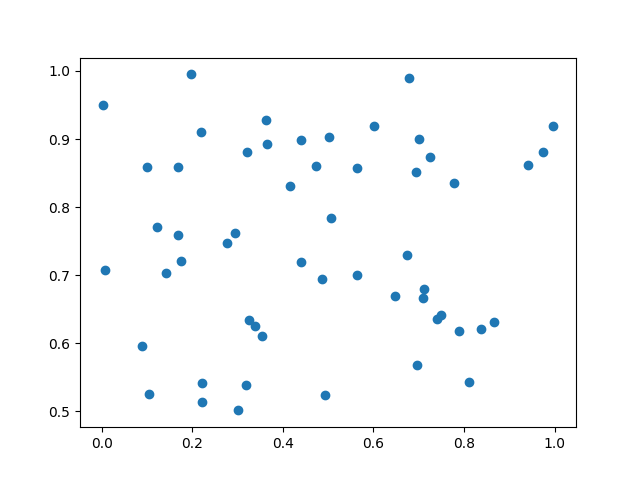

In [1]:
# import graphics module
import matplotlib.pyplot as plt

# plot points above the line
plt.clf()
plt.scatter(x=vecs[ndx,0],y=vecs[ndx,1])
plt.savefig('img/above.png')

Switch the Boolean values in `above`, making `ndx` the indices of the
points below the line, and print those points with a marker:



In [1]:
plt.clf()
ndx = above.nonzero()[0] 
plt.scatter(x=vecs[ndx,0],y=vecs[ndx,1])
ndx = (1 - above).nonzero()[0]
plt.scatter(x=vecs[ndx,0],y=vecs[ndx,1],marker='+')
plt.axhline(y=0.5, color='red', linestyle="dashed") # Add horizontal line at y=0.5
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Estimate the area below a horizontal barrier at y=0.5")
plt.savefig('img/above_and_below.png')

### Estimating the area below a slanted barrier



To divide the random points by a slanted line, notice that the
dividing line (and our "decision surface") is defined by $y=mx+b$
where $m$ is the `slope` and $b$ is the `intercept`.

As before, we create 100 random vectors in the plane, set the `slope`
and `intercept` values:



In [1]:
slope = -1.3
intercept = 0.8
vecs = np.random.ranf((100,2))

Plot the points (with `scatter(x,y)` and the line (with `plot(x,y)`):



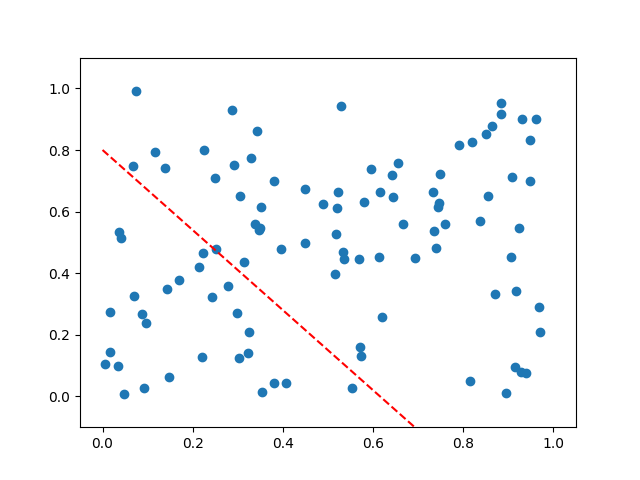

In [1]:
# import graphics and numeric libraries
import matplotlib.pyplot as plt
import numpy as np

# clear graphics 
plt.clf()

# plot random vectors
plt.scatter(x=vecs[:,0],y=vecs[:,1])

# create array x of 2 values in [0,1] 
x = np.linspace(0,1,2)

# generate line with slope and intercept
y = x * slope + intercept

# plot line
plt.plot(x,y,color="red",linestyle="dashed")

# fix display limits for viewing
plt.ylim(-0.1,1.1)
plt.savefig('img/slanted.png')

To determine if an (x,y) point is above the line, the y value of the
point is compared with the corresponding value in yline. Convert the
resulting Boolean vector into numbers with `nonzero`:



In [1]:
# create line taking the x array from the random vectors
yline = vecs[:,0] * slope + intercept

# check if y value is above the line and store in ndx index vector
ndx = (vecs[:,1] > yline).nonzero()[0]

Plot the resulting points:



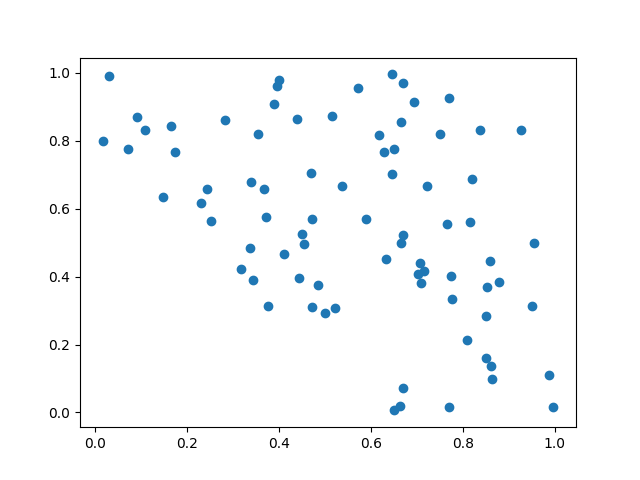

In [1]:
plt.clf()
plt.scatter(vecs[ndx,0],vecs[ndx,1])
plt.savefig('img/yline_above.png')

Do the same for the points below the line: create Boolean vector,
convert it to indices and store it in `ndx`, then plot the result and
mark the points with a \`+\`:



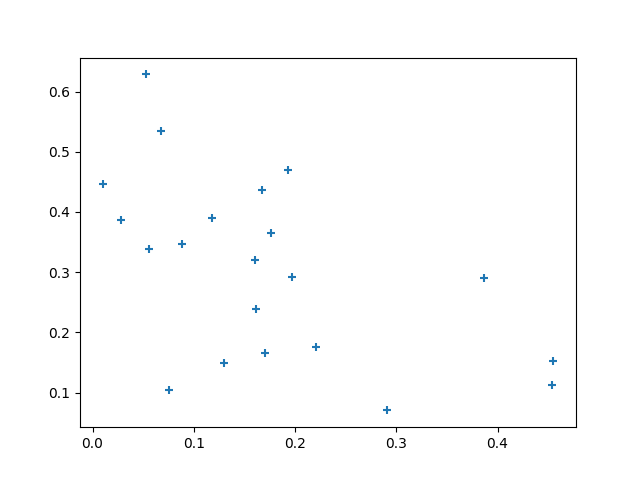

In [1]:
# check if y value is below the line and store in ndx index vector
ndx = (vecs[:,1] < yline).nonzero()[0]

plt.clf()
plt.scatter(vecs[ndx,0],vecs[ndx,1],marker='+')
plt.savefig('img/yline_below.png')

Put the code blocks together and plot the line using y defined earlier
to show the decision surface:



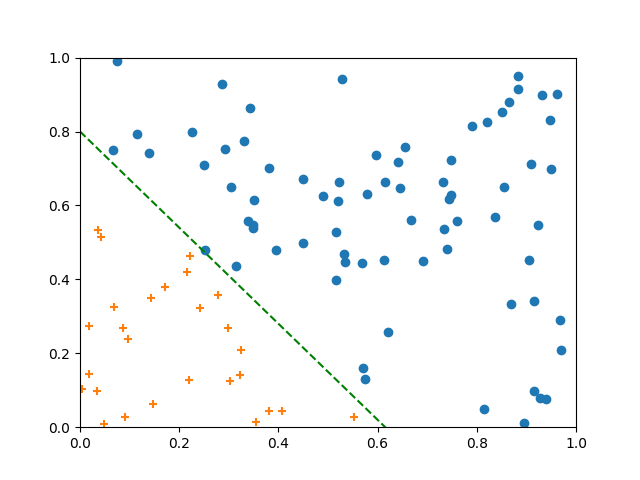

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# define the decision surface
yline = vecs[:,0] * slope + intercept

plt.clf()

# points above the line
ndx = (vecs[:,1] > yline).nonzero()[0]
plt.scatter(vecs[ndx,0],vecs[ndx,1])

# points below the line
ndx = (vecs[:,1] < yline).nonzero()[0]
plt.scatter(vecs[ndx,0],vecs[ndx,1], marker='+')

# draw the line
plt.plot(x,y,color="green",linestyle="dashed")

# fix the display limits
plt.xlim(0,1)
plt.ylim(0,1)

plt.savefig('img/yline_above_below.png')

In [1]:
plt.clf()
plt.plot(x,y)
plt.ylim(0,1)
plt.savefig('img/line.png')